# 452 Assignment 2 
## Shaolong (Fred) Xue



In [156]:
import sys
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.regression import linear_model
from statsmodels.graphics.factorplots import interaction_plot
import math
import matplotlib.pyplot as plt

## Question 1

In [21]:
sales = pd.read_csv("sales.csv")
print(sales)

      Unnamed: 0  area1_sales  area2_sales  area3_sales  total_sales
0           1000         0.79         0.80         0.02         1.75
1           1001         0.83         0.08         0.18         1.75
2           1002         0.85         0.01         0.22         1.75
3           1003         1.25         0.00         0.03         1.75
4           1004         0.72         0.04         0.10         1.74
...          ...          ...          ...          ...          ...
2995        3995         0.20         0.00         0.07         0.49
2996        3996         0.28         0.00         0.04         0.49
2997        3997         0.00         0.49         0.00         0.49
2998        3998         0.07         0.09         0.07         0.49
2999        3999         0.24         0.00         0.06         0.49

[3000 rows x 5 columns]


In [46]:
x = sales[['area1_sales', 'area2_sales', 'area3_sales']]
y = sales[['total_sales']]

In [47]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size= 0.25 , random_state=42)

In [48]:
ro_scaler=RobustScaler()
x_train=ro_scaler.fit_transform(x_train)
x_test=ro_scaler.fit_transform(x_test)

In [51]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [52]:
print(reg.score(x_test, y_test))
print(reg.intercept_)
print(reg.coef_)

0.5607101612805446
[0.76212315]
[[0.30837903 0.05992989 0.12899234]]


In [72]:
y_pred = reg.predict(x_test)

print("Predictions: {}, Actual Values: {}".format(y_pred[:1], y_test[:1]))

Predictions: [[0.70417681]], Actual Values:       total_sales
1801         0.72


In [78]:
x_interaction = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(x)

interaction_df = pd.DataFrame(x_interaction, columns = ['area1_sales','area2_sales','area3_sales','area1_sales:area2_sales','area1_sales:area3_sales', 'area2_sales:area3_sales'])

In [87]:
interaction_model = linear_model.OLS(y, interaction_df).fit()

interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            total_sales   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              9866.
Date:                Sun, 22 Jan 2023   Prob (F-statistic):                        0.00
Time:                        15:02:53   Log-Likelihood:                          378.66
No. Observations:                3000   AIC:                                     -745.3
Df Residuals:                    2994   BIC:                                     -709.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
area1_sales                 1.2706      0.012    108.470      0.000       1.248       1.294
area2_sales                 0.9917      0.018     55.936      0.000       0.957       1.027
area3_sales                 2.5592      0.057     44.761      0.000       2.447       2.671
area1_sales:area2_sales    -0.0004      0.078     -0.005      0.996      -0.153       0.152
area1_sales:area3_sales    -1.0395      0.140     -7.403      0.000      -1.315      -0.764
area2_sales:area3_sales     0.4905      0.421      1.165      0.244      -0.335       1.316
==============================================================================
Omnibus:                      578.355   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12642.192
Skew:                          -0.303   Prob(JB):                         0.00
Kurtosis:                      13.038   Cond. No.                         59.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Question 2

In [98]:
customers = pd.read_csv("customer.csv")

customers['Gender'].replace(['Female','Male'],[0, 1],inplace=True)

print(customers)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       0   26            43000          0
3    15603246       0   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       0   46            41000          1
396  15706071       1   51            23000          1
397  15654296       0   50            20000          1
398  15755018       1   36            33000          0
399  15594041       0   49            36000          1

[400 rows x 5 columns]


In [99]:
x = customers[['Gender', 'Age', 'EstimatedSalary']]
y = customers[['Purchased']]

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size= 0.3 , random_state=42)

In [125]:
# full model
full = LogisticRegression()
full.fit(x, y)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [128]:
# trimmed model 1: no Gender
xt1 = customers[['Age', 'EstimatedSalary']]

x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(xt1, y, test_size= 0.3 , random_state=42)

trimmed1 = LogisticRegression()
trimmed1.fit(x_train1, y_train1)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [129]:
# trimmed model 2: no Age
xt2 = customers[['Gender', 'EstimatedSalary']]

x_train2 , x_test2 , y_train2 , y_test2 = train_test_split(xt2, y, test_size= 0.3 , random_state=42)


trimmed2 = LogisticRegression()
trimmed2.fit(x_train2, y_train2)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [130]:
# trimmed model 3: no Estimated Salary
xt3 = customers[['Age', 'Gender']]

x_train3 , x_test3 , y_train3 , y_test3 = train_test_split(xt3, y, test_size= 0.3 , random_state=42)


trimmed3 = LogisticRegression()
trimmed3.fit(x_train3, y_train3)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [131]:
#print(y_pred_prob)

print(full.score(x, y))
print(trimmed1.score(x_train1, y_train1))
print(trimmed2.score(x_train2, y_train2))
print(trimmed3.score(x_train3, y_train3))

0.6425
0.6571428571428571
0.6571428571428571
0.825


We have four models in total. Comparing the in-sample R^2 values, we see the best performing model is the last one, in which "EstimatedSalary" variable is excluded. 

## Question 3

In [140]:
print(trimmed3.coef_)

[[0.17258353 0.12546538]]


In [145]:
print(math.exp(0.17258353))
print(math.exp(0.12546538))

1.188371081105721
1.1336759204207734


The selected model with best R^2 value: "Purchase ~ Age + Gender"

The coefficient for "Age" is 0.17258. It means that with a 1 year increase in age, the odds of the customer purchasing increases by 18.83%.

The coefficient for "Gender" is 0.1254. It means that a male customer is 13.36% more likely to purchase than a female customer (Male = 1, Female = 0).

Question 4

In [148]:
customers['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

Accuracy is a useful assessment when there is a balanced sample (i.e. approximately equal number of purchased and not purchased). Here, there are 143 purchased customers and 257 not-purchased customers. It's not a balanced sample and the accuracy measure can be affected. 

Instead, I would use ROC because it balances true positive rates and false positive rates. 

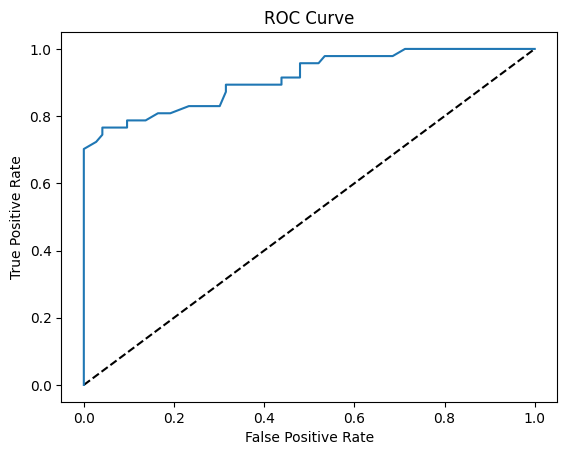

In [154]:
y_pred_prob_t3 = trimmed3.predict_proba(x_test3)[:, 1]

fpr, tpr, threshods = roc_curve(y_test3, y_pred_prob_t3) 

plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

Question 5

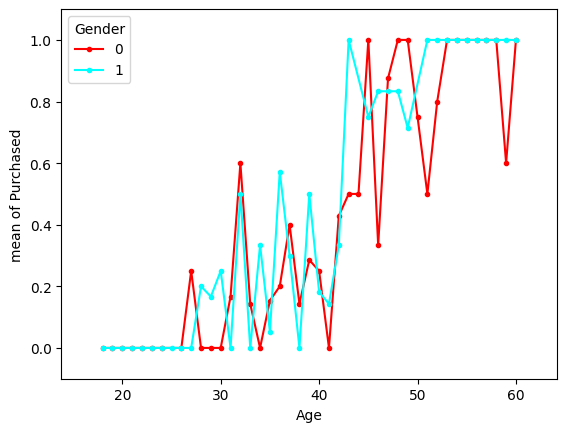

In [161]:
interaction_plot(customers['Age'], customers['Gender'], customers['Purchased'])
plt.show() # Male = 1, Femal = 0

## Question 6

### Plot a

Based on this plot, I would include the interaction. Even though it doesn't show any significant interactions between the income classes and average saving, it nontheless depicts the general relationship that the higher your income class, the higher your average saving. 

Plus, it captures an interesting trend that, the higher your income is, the faster your average savings will grow. This can be seen by comparing the slope of the three income classes. 

### Plot b

Based on this plot, I would include the interaction because the crossing of the line clearly indicates there is a significant interaction between income class and average savings. It shows that the average saving of high income class is decreasing to meet that of the low income class. This is an interesting piece of information and should be captured in the model. 

### Plot c

Based on this plot, I would not include the interaction variable because the lines are parallel for income classes. This means there's no interaction between the income classes and average savings. It simply shows that high income class has higher average savings than low income class (by the higher of the orange line). This info is useful however it pretty much goes without saying. So there is not much value to add for including this interation term as it won't outweight the cost of including an additional variable in the model. 